In [1]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
def a(x,y):
    print(x)
    print(y)
    a=(x+y)/20
    print("av is",a)
    return a


In [9]:
avg(2,4)


2
4
av is 0.3


0.3

In [11]:
import numpy
a = numpy.zeros([3,2])
print(a)

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


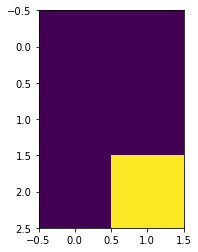

In [12]:
import numpy
import matplotlib.pyplot
%matplotlib inline
a = numpy.zeros([3,2])
a[2,1]=12
matplotlib.pyplot.imshow(a,interpolation="nearest")

In [14]:
import numpy
import scipy.special

In [36]:
class neuralNetwork:
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        self.wih = numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who = numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        self.lr = learningrate
        self.activation_function = lambda x: scipy.special.expit(x)
        
    def train(self,inputs_list,targets_list):
        inputs = numpy.array(inputs_list,ndmin=2).T
        targets= numpy.array(targets_list,ndmin=2).T
        
        hidden_inputs= numpy.dot(self.wih,inputs)
        hidden_outputs= self.activation_function(hidden_inputs)
        
        final_inputs= numpy.dot(self.who,hidden_outputs)
        final_outputs= self.activation_function(final_inputs)
        
        output_errors= targets - final_outputs
        hidden_errors = numpy.dot(self.who.T,output_errors)
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
    def query(self,inputs_list):
        inputs = numpy.array(inputs_list,ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
    
            
    

In [37]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

learning_rate = 0.3
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [68]:
n.query([1,1,1])



array([[ 0.53694508],
       [ 0.57395248],
       [ 0.45299413]])